# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
import pprint as pp

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/duynguyen/Documents/Documents - DUY’s Mac mini/GitHub/ads509_module2"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens #ratio of different unique word stems (types) to the total number of words
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        counter = Counter(tokens)
        most_common = counter.most_common(5)
        pp.pprint(most_common)
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial as a sanity check in the code, helping during the development phase for documenting, debugging, and testing code to test for a given condition.

Reference: Kumar, S. (2022 June 24). Pythong Tips: Assertions in Python. Medium. https://medium.com/faun/python-tips-assertions-in-python-12ec7748f8c4. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data, used chatgpt on 5/19/2025 to clean input of data and help with error messages
lyrics_data = defaultdict(dict)

for artist in os.listdir(lyrics_folder):
    artist_dir = os.path.join(lyrics_folder, artist)
    if os.path.isdir(artist_dir):
        for song_file in os.listdir(artist_dir):
            if song_file.endswith(".txt"):
                song_title = song_file.replace(".txt", "")
                file_path = os.path.join(artist_dir, song_file)
                with open(file_path, "r", encoding="utf-8") as f:
                    lyrics = f.read()
                lyrics_data[artist][song_title] = lyrics

In [7]:
# Read in the twitter data
twitter_descriptions = defaultdict(list)

for file in os.listdir(twitter_folder):
    if file.endswith(".txt"):
        artist = file.replace('.txt', '').replace('_followers_data', '').strip().lower()
        file_path = os.path.join(twitter_folder, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]
            twitter_descriptions[artist].extend(lines)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
from string import punctuation
import string
punctuation = str.maketrans('','', string.punctuation) # speeds up comparison, update set to string

In [9]:
# create your clean lyrics data here
cleaned_lyrics_data = defaultdict(dict)

for artist, songs in lyrics_data.items():
    for song, text in songs.items():
        text = text.lower() # lower case
        text = text.translate(punctuation) # punctuations
        tokens = text.split() #split on whitespace
        tokens = [word for word in tokens if word not in sw] #use stop words from NLTK
        
        cleaned_lyrics_data[artist][song] = tokens


In [10]:
# create your clean twitter data here
cleaned_twitter_descriptions = defaultdict(list)

for artist, descriptions in twitter_descriptions.items():
    for desc in descriptions:
        desc = desc.lower()
        desc = desc.translate(punctuation)
        tokens = desc.split()  #split on whitespace
        tokens = [word for word in tokens if word not in sw] #use stop words from NLTK
        
        cleaned_twitter_descriptions[artist].append(tokens)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [11]:
clarkson_lyrics_tokens = []
for song in cleaned_lyrics_data['clarkson'].values():
    clarkson_lyrics_tokens.extend(song)

descriptive_stats(clarkson_lyrics_tokens, verbose=True)

There are 5986 tokens in the data.
There are 991 unique tokens in the data.
There are 29219 characters in the data.
The lexical diversity is 0.166 in the data.
[('im', 154), ('know', 137), ('dont', 121), ('oh', 90), ('love', 85)]


[5986, 991, 0.165552956899432, 29219]

In [12]:
rascal_lyrics_tokens = []
for song in cleaned_lyrics_data['rascal'].values():
    rascal_lyrics_tokens.extend(song)

descriptive_stats(rascal_lyrics_tokens, verbose=True)

There are 5632 tokens in the data.
There are 1110 unique tokens in the data.
There are 27112 characters in the data.
The lexical diversity is 0.197 in the data.
[('love', 159), ('im', 97), ('one', 79), ('like', 78), ('yeah', 76)]


[5632, 1110, 0.19708806818181818, 27112]

In [13]:
cher_twitter_tokens = []
for desc in cleaned_twitter_descriptions.get('cher', []):
    cher_twitter_tokens.extend(desc)
    
descriptive_stats(cher_twitter_tokens, verbose=True)

There are 42404149 tokens in the data.
There are 10667110 unique tokens in the data.
There are 266424726 characters in the data.
The lexical diversity is 0.252 in the data.
[('0', 334292), ('1', 284601), ('2', 237886), ('love', 221728), ('3', 196690)]


[42404149, 10667110, 0.2515581671029408, 266424726]

In [14]:
robynkonichiwa_twitter_tokens = []
for desc in cleaned_twitter_descriptions.get('robynkonichiwa', []):
    robynkonichiwa_twitter_tokens.extend(desc)
    
descriptive_stats(robynkonichiwa_twitter_tokens, verbose=True)

There are 3888265 tokens in the data.
There are 1136751 unique tokens in the data.
There are 24106279 characters in the data.
The lexical diversity is 0.292 in the data.
[('0', 31800), ('1', 24115), ('2', 17675), ('music', 16049), ('3', 14372)]


[3888265, 1136751, 0.29235430198301815, 24106279]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Leaving stop words in the data would have drastically changed the top five top words, possibilty including words like "such", "and", "the" etc.  May have been good to find a way to filter numbers from the twitter text.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: After learning about lexical diversity the thought is that they are fairly similar amougst artists, case being most artists stick to a genre of music and while the melodies are difference most of the themes generally remain the same.





## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [15]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)")) #sends error for text emojis

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [16]:
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA] #dictionary of emojis

emoji_stats = {}

for artist, descriptions in twitter_descriptions.items():
    emoji_list = []
    for desc in descriptions:
        emoji_list.extend(extract_emojis(desc))
    emoji_stats[artist] = Counter(emoji_list).most_common(10)

print("Top hashtags for Cher:")
print(emoji_stats.get('cher', []))

print("Top hashtags for Robyn:")
print(emoji_stats.get('robynkonichiwa', []))

Top hashtags for Cher:
[('❤', 94506), ('🌈', 66291), ('♥', 48059), ('🏳', 47174), ('✨', 45846), ('🌊', 31234), ('💙', 31050), ('🏻', 25195), ('✌', 21963), ('💜', 21571)]
Top hashtags for Robyn:
[('🌈', 6086), ('❤', 5635), ('🏳', 4641), ('♥', 4249), ('✨', 3217), ('🏻', 1751), ('✌', 1495), ('♀', 1347), ('🏼', 1340), ('💙', 1200)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [17]:
def extract_hashtags(text):
    return [word.lower() for word in text.split() if word.startswith('#')]

hashtag_stats = {}

for artist, descriptions in twitter_descriptions.items():
    hashtag_list = []
    for desc in descriptions:
        hashtag_list.extend(extract_hashtags(desc))
    hashtag_stats[artist] = Counter(hashtag_list).most_common(10)

print("Top hashtags for Cher:")
print(hashtag_stats.get('cher', []))

print("\nTop hashtags for Robyn:")
print(hashtag_stats.get('robynkonichiwa', []))

Top hashtags for Cher:
[('#resist', 9729), ('#blm', 9271), ('#blacklivesmatter', 7770), ('#fbr', 2991), ('#theresistance', 2929), ('#1', 2580), ('#resistance', 2438), ('#', 2205), ('#voteblue', 1939), ('#lgbtq', 1461)]

Top hashtags for Robyn:
[('#blacklivesmatter', 601), ('#blm', 365), ('#music', 262), ('#1', 213), ('#', 175), ('#teamfollowback', 118), ('#edm', 104), ('#resist', 77), ('#freebritney', 70), ('#blacktranslivesmatter', 58)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [18]:
#could not figure out how to get the dataset to code the top songs titles

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

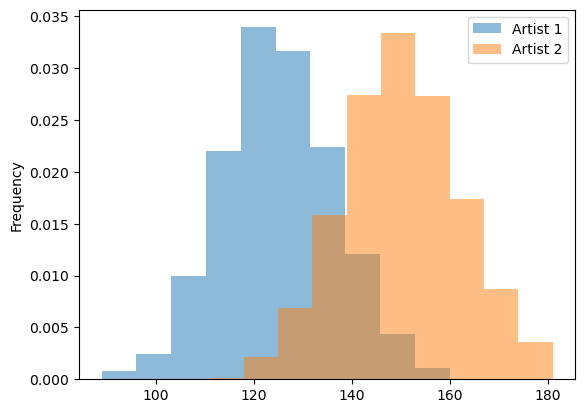

In [19]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: 


In [20]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [21]:
# Your lyric length comparison chart here